In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data['prefarea'].unique()  

array(['yes', 'no'], dtype=object)

In [7]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
# # Mapping 'prefarea' (yes -> 1, no -> 0)
# data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

# # Mapping 'furnishingstatus' (furnished -> 0, semi-furnished -> 1, unfurnished -> 2)
# data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})

data = pd.get_dummies(data, drop_first=True)

In [9]:
X = data.drop('price', axis=1)
y = data['price']

In [10]:
numeric_df = data.select_dtypes(include=[np.number])
numeric_df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print("\nModel Evaluation Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


Model Evaluation Metrics:
MAE: 970043.403920164
MSE: 1754318687330.6643
R² Score: 0.6529242642153184


In [16]:
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Model Coefficients:
Intercept: 260032.35760741495
Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]


In [21]:
correlation_matrix = data.corr()  # Correlation matrix of the dataset
print(correlation_matrix['price'])  # Check correlation with the target

price                              1.000000
area                               0.535997
bedrooms                           0.366494
bathrooms                          0.517545
stories                            0.420712
parking                            0.384394
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
airconditioning_yes                0.452954
prefarea_yes                       0.329777
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


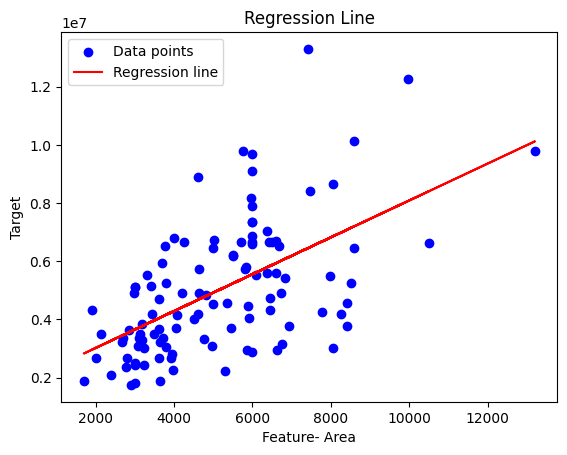

In [22]:
X_feature = X_test.iloc[:, 0]  # Extracting the first feature

# Fit the linear regression model
model = LinearRegression()
model.fit(X_feature.values.reshape(-1, 1), y_test)  # Reshaping to 2D array for sklearn

# Create predictions
y_pred = model.predict(X_feature.values.reshape(-1, 1))

# Plotting
plt.scatter(X_feature, y_test, color='blue', label='Data points')  # scatter plot for data points
plt.plot(X_feature, y_pred, color='red', label='Regression line')  # regression line
plt.xlabel('Feature- Area')
plt.ylabel('Target')
plt.title('Regression Line')
plt.legend()
plt.show()
